# 이론   
공간적 구조(spatial structure) 정보가 유실된다면 2d 공간에서 점들간의 거리로 나타낼 수 있는 정보가 사라지게 된다.   
**따라서, 공간적 구조 정보를 보존하고 이용할 수 있는 신경망 구조 및 정보 처리 방식이 필요해진다.**

## 시각 피질 구조
자연계에서 이미지의 공간 정보를 분석할 때, **각 픽셀마다 근처의 정보를 취합하는 것을 반복**하여 최종적으로 전체를 분석한다는 것을 알 수 있다.   
CNN은 이러한 구조에 착안하여 개발된 신경망 구조이다.   
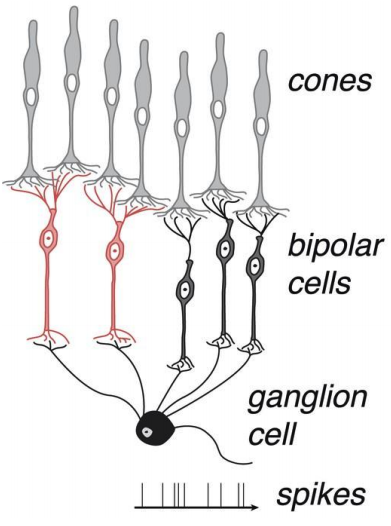

## 합성곱 연산 - 채널 
이미지는 3차원 텐서로 표현한다.   
마지막 차원의 경우 흑백은 1, 컬러는 3이다.
- 즉 R,G,B에 해당하는 흑백 이미지 3장을 가지고 있다.
- 이러한 이미지 색상에 해당하는 차원 혹은 **가로, 세로 이외 3번째 차원을 채널(channel)이라고 한다.**
- 채널은 색상에 한정되지 않고 다양한 종류의 정보를 담을 수 있다, 즉 3혹은 1에 한정되지 않는다.

## 합성곱 연산
합성곱 층(convolution layer)은 신경망 층 구성 방식으로써 합성곱 연산을 통해 다음 층에 내보낼 출력값을 계산한다.   
이 연산에는 **입력값 및 커널**(혹은 필터라고도 함)이 필요하다. 연산은 아래와 같다.
1. 입력값에 커널을 붙임
2. 커널을 **스트라이드** 만큼 움직임
3. 입력값과 커널이 **겹친 공간의 값들을 모두 각 위치끼리 곱해서 더함**

일반적으로 커널은 입력값보다 작은 크기를 가진다.   
합성곱 신경망에서 합성곱 결과로 나온 값들을 **특징 맵(feature map)** 이라고 한다.   
   
기본적으로 1보다 큰 커널로 합성곱을 진행하면 **특징 맵의 크기가 점점 작아지게 됨.** 그리고 이것은 문제가 될 수 있다. 합성곱 이후에도 특징 맵 크기가 동일하다면 원하는 만큼 layer를 쌓을 수 있다.   
입력값 주변에 다른 값들로 **패딩**을 둘러주어야 한다.   
패딩 값은 주로 0을 활용한다.      

합성곱 층 위주로 이루어진 신경망 구조를 합성곱 신경망, CNN이라고 한다.   
합성곱 층의 가중치 및 편향은 MLP에서와는 다른 구조를 보이며, CNN에서도 맨 마지막인 **분류를 담당하는 레이어들은 MLP 형태를 사용한다.**   
합성곱 층에서도 편향을 추가할 수 있으며 이 때 편향은 커널당 하나의 값이 있다. - 해당 커널로부터 생성된 특징 맵의 모든 요소에 같은 값을 더하는 식.   

#### Feature map 크기 계산
- I: 입력 텐서
- K: 커널
- S: stride
- P: Padding   

$O_h = floor(\frac{I_h-K_h+2P}{S} + 1)$   
$O_w = floor(\frac{I_w-K_w+2P}{S} + 1)$   
당연한 수식, 유도도 쉽다. 알고있자.   
입력 텐서의 채널 수 만큼의 커널이 있어야 특징 맵 하나를 생성할 수 있다.   
즉, 다수의 커널을 사용하면 원하는 개수의 채널을 갖는 특징 맵을 생성할 수 있다.   
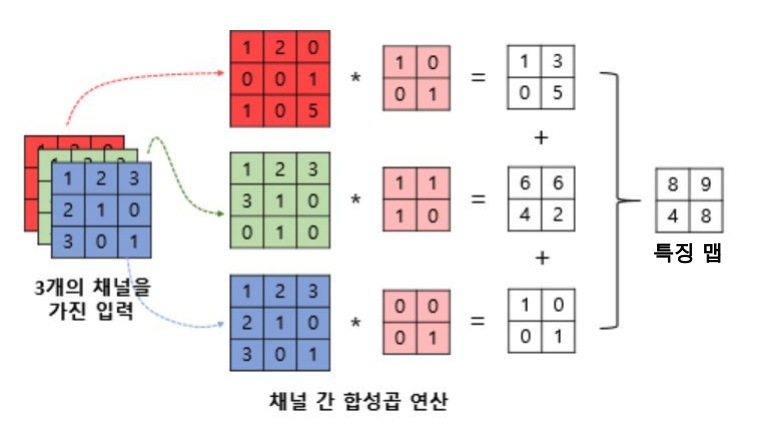
- 따라서 합성곱 층에서 필요한 커널 개수는 $C_i \times C_o$
  - 입력 텐서 채널 3, 특징 맵 채널 5면 15개 커널 필요 -> 왜냐? 각 입력 채널에 대한 하나의 커널이 있고, 이러한 커널 수는 출력 채널의 수만큼 필요하다. 3->1 + 3->1 + 3->1 + 3->1 + 3->1 = 15
- 합성곱 층의 가중치 매개변수 개수
  - (단일 커널에 들어가는 매개변수 개수) * (총 커널 개수)
  - $(K_h \times K_w)\times(C_i \times C_o)$
  - 위 예시에서 커널 크기가 3이면 합성곱 층에는 $3*3*15=135$개의 매개변수가 존재

## 풀링(pooling)
주어진 입력값에서 정보를 추출한 후 크기가 줄어든 특징 맵을 생성하는 연산의 일종으로, max pooling과 avg pooling이 주로 사용된다.   
저레벨의 feature들을 바탕으로 고레벨의 feature를 학습하기 위해 필요한 과정이다.   
일반적으로 2X2 커널에 대해 stride 2를 적용한다.   
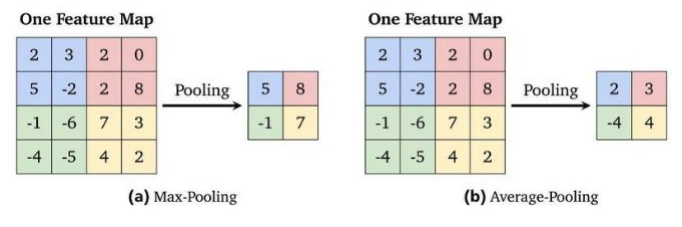

## 합성곱 신경망
합성곱 신경망은 **합성곱 층 및 풀링 층을 반복**하여 쌓아서 만들어지며, 맨 마지막에는 MLP를 이용해 분류 혹은 회귀 등의 작업을 수행한다.   
이러한 신경망에서는 **표현 학습**을 수행한다고 볼 수 있다.   
학습된 표현은 MLP 입력에 적합한 1차원 형태로 바뀌며 이를 flatten이라고 한다.   
flatten된 뒤의 연산을 담당하는 MLP에서는 본격적 분류 및 회귀를 수행한다.   
즉, CNN은 **전통적인 MLP와 더불어 표현 학습을 수행하기 위한 합성곱 및 풀링 층들을 결합**한 것.
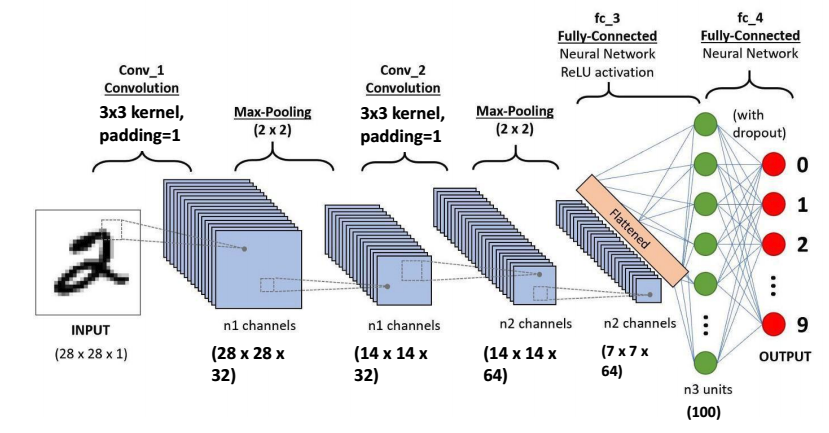

# 구현
위 그림이 실습에서 구현할 CNN의 구조이다.   
**컨볼루션 이후에는 피처맵에 활성 함수를 적용**하며, 현 예시에서는 ReLU를 사용했다.   
보통 **conv, activation, pooling**을 엮어 하나의 layer로 취급한다.   
보통 3X3 커널을 사용하며, 3X3 커널을 사용하는 layer를 여러번 중첩하는 것이 큰 크기의 커널을 사용하는 단일 layer보다 더 적은 파라미터로 유사한 성능을 낼 수 있다.   
그림의 두번째 layer에서도 3X3 커널로 컨볼루션을 수행한 후 풀링을 진행했다.   
다만 채널 개수가 32 -> 64로 증가했다.   
이는 풀링 수행시 데이터가 1/4로 줄어들기 때문에 정보 손실 완화를 위해 **풀링 이후의 컨볼루션 연산 시에는 채널을 2배로** 늘려주는 것이 일반적이기 때문이다.   
코드를 작성해보자.

In [7]:
import torch
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = nn.Sequential(
      nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer2 = nn.Sequential(
      nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.fc = nn.Sequential( # Fully Connected
      nn.Linear(7 * 7 * 64, 100), # 7*7*64의 인풋을 선형변환을 거쳐 100개의 아웃풋으로 변환
      nn.ReLU(),
      nn.Linear(100, 10))
    
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.size(0), -1) # Flatten
    out = self.fc(out)
    return out

In [8]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

training_epochs = 3
batch_size = 100

mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for i, (x_train, y_train) in enumerate(data_loader):
    x_train = x_train.to(device)
    y_train = y_train.to(device)
    
    outputs = model(x_train)
    cost = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    avg_cost += cost / total_batch
    
  print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))
  
print('Learning Finished!')

with torch.no_grad():
  x_test = mnist_test.data.view(len(mnist_test), 1, 28, 28).float()
  y_test = mnist_test.targets
  
  prediction = model(x_test)
  correct_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

[Epoch:    1] cost = 0.345991611
[Epoch:    2] cost = 0.147684932
[Epoch:    3] cost = 0.127425492
Learning Finished!
Accuracy: 0.9327999949455261
